# Logistic Regression Algorithm

## Classical imports and getting the dataset

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Getting the clean datasets :

In [2]:
tf= pd.read_csv(r'../data/train.csv')
rf= pd.read_csv(r'../data/test.csv')

Checking that the datasets are ok :

In [3]:
tf #the training dataset

,userId,age,gender,scentLover,ecoInterest,MrPropre,Antikal,Ariel,Dash,pods,...,magasin,moyenneSurface,superMarket,hyperMarket,drive,hardDiscount,interested_by_fairypeps_email,level_of_interest_about_marketing,number_of_actions,washDishes
0,use_XbA1FTDcCrTMNTHK1851TzjyPMP,0.077922,1.0,0.000000,0.386816,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.002068,1
1,use_3WHgsMVGSg5MHG2zja91TzdfmY2,0.636364,1.0,0.379664,0.666667,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.022234,1
2,use_2SisOiR8QwDaHI4svm11TzcvK7V,0.350649,1.0,0.000000,0.666667,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.009824,1
3,use_W0T1LmfKaQPJYD1RTWh1Tzdc69H,0.220779,1.0,0.333333,0.333333,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.4,0.002327,0
4,use_KwYWZ7UMl4veveOaPGK1TzddtmI,0.259740,1.0,0.379664,0.000000,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.936143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,use_ICSyEvCcRNPpQeBdWcM1TzdczV8,0.454545,1.0,0.379664,0.386816,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.043175,1
11996,use_Q5DNYeSmG7g6VeMV4n71TzeTRRz,0.324675,1.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.2,0.000517,0
11997,use_rEoce5pc0MlKpndfzNj1Tze3J1L,0.311688,1.0,0.379664,0.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.4,0.009824,0
11998,use_0AuDL2wOJHy9I16zSC21TzeHRMo,0.272727,0.0,0.379664,0.386816,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.000259,1


In [4]:
rf #the testing dataset

,userId,age,gender,scentLover,ecoInterest,MrPropre,Antikal,Ariel,Dash,pods,...,nbChildren,magasin,moyenneSurface,superMarket,hyperMarket,drive,hardDiscount,interested_by_fairypeps_email,level_of_interest_about_marketing,number_of_actions
0,use_yFJKoOUCJ7ED8c8Xeov1TzdfpRL,0.259740,1.0,0.379664,0.666667,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.005946
1,use_t1WpMt2fprbjEteXNSZ1TzdyvAi,0.350649,1.0,0.379664,0.666667,0.0,0.0,1.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.001551
2,use_w9jT58WcsP3tUkPCA0A1TzgYdeE,0.116883,1.0,0.379664,0.386816,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.005946
3,use_onifqa3LnOsjZOhPYfN1TzdfkfA,0.623377,1.0,0.379664,0.386816,1.0,0.0,0.0,0.0,0.0,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.00000,0.040848
4,use_KgP1NlkmR24pbU9KRwK1Tzdqm8u,0.311688,1.0,0.000000,0.333333,0.0,0.0,1.0,1.0,1.0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.134436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,use_yXWhQEP4R6vvYOeJzz61TZU7JRs,0.415584,1.0,1.000000,0.666667,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.953082,0.71773,0.019794
3996,use_MafnxsXODJV5oVhfi1h1TzdgYQT,0.324675,1.0,0.333333,0.666667,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.000000,0.40000,0.008273
3997,use_Pbui34WhFhPjNeX6TEz1TzdZdVv,0.259740,1.0,1.000000,1.000000,0.0,0.0,1.0,1.0,1.0,...,0.4,0.0,1.0,0.0,0.0,0.0,0.0,-0.953082,0.71773,0.019794
3998,use_sDxhHoOEzHyrAzWSPnM1TzdYVjB,0.259740,1.0,0.333333,0.386816,1.0,1.0,1.0,1.0,0.0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.00000,0.015770


In [5]:
#Deleting the Id (we don't want our training to take into account the Id)
tf=tf.drop(columns='userId')
sol=pd.DataFrame({'userId':rf['userId']}) #creating the dataframe for the solution and getting the ID
rf=rf.drop(columns='userId') #dropping the id to have the same structure as the training dataset

In [6]:
# A last clean to have float64 values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

tf=clean_dataset(tf)
rf=clean_dataset(rf)

## Logistic Regression Model

In [7]:
#To see what the best parameters are
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

In [8]:
#Splitting our dataset into one set of training and one set of test
y = tf.washDishes.values
x = tf.drop(['washDishes'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [9]:
#Logistic Regression
param_grid = {'C': [0.1,0.2,0.5,1,10], 'max_iter': [250, 500], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]} #testing different parameters for C, max_iter and tol

#GridSearch automatically takes the best parameter after testing all the options
lr = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=5, refit=True, verbose=0) 
lr.fit(x_train,y_train) #the fitting

acc = lr.score(x_test,y_test)*100 #calculating the accuracy

print(best_model(lr)) # to show the best parameters found by GridSearch
print("Test Accuracy {:.2f}%".format(acc)) # to show the accuracy

0.6411458333333333
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, max_iter=250, tol=1e-05)
None
Test Accuracy 64.79%


## Prediction

In [10]:
#Predicting, and exporting to csv to make a submission
y_pred = lr.predict(rf) #the prediction
sol['washDishes'] = y_pred
sol["washDishes"] = sol["washDishes"].apply(lambda e: 'Auto' if e == 1 else 'Hand') #replacing the -1 and 1 with the original values
sol.to_csv('../data/lrsolution.csv', index=False) #exporting to csv without the index
sol #checking the output

,userId,washDishes
0,use_yFJKoOUCJ7ED8c8Xeov1TzdfpRL,Hand
1,use_t1WpMt2fprbjEteXNSZ1TzdyvAi,Hand
2,use_w9jT58WcsP3tUkPCA0A1TzgYdeE,Hand
3,use_onifqa3LnOsjZOhPYfN1TzdfkfA,Auto
4,use_KgP1NlkmR24pbU9KRwK1Tzdqm8u,Hand
...,...,...
3995,use_yXWhQEP4R6vvYOeJzz61TZU7JRs,Hand
3996,use_MafnxsXODJV5oVhfi1h1TzdgYQT,Hand
3997,use_Pbui34WhFhPjNeX6TEz1TzdZdVv,Auto
3998,use_sDxhHoOEzHyrAzWSPnM1TzdYVjB,Hand


## Confusion matrix

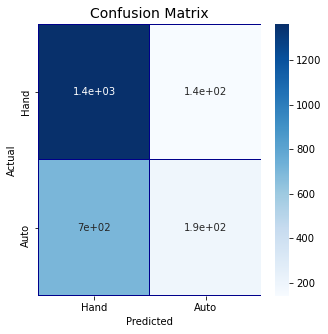

In [11]:
preds=lr.predict(x_test)
def plot_confusion_matrix():
    cm = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['Hand', 'Auto'],
                yticklabels=['Hand', 'Auto'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

plot_confusion_matrix()